## EDA

Proceso EDA de para estudiar los datos, y preparacion para hacer un modelo de recomendación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

### Steam Games

In [2]:
# Se define el archivo a consultar
steam_games = pd.read_csv('../datasets/steam_games.csv')

In [3]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27834 entries, 0 to 27833
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   27834 non-null  object 
 1   price                      27834 non-null  float64
 2   id                         27834 non-null  int64  
 3   developer                  27834 non-null  object 
 4   Accounting                 27834 non-null  int64  
 5   Action                     27834 non-null  int64  
 6   Adventure                  27834 non-null  int64  
 7   Animation &amp; Modeling   27834 non-null  int64  
 8   Audio Production           27834 non-null  int64  
 9   Casual                     27834 non-null  int64  
 10  Design &amp; Illustration  27834 non-null  int64  
 11  Early Access               27834 non-null  int64  
 12  Education                  27834 non-null  int64  
 13  Free to Play               27834 non-null  int

In [4]:
steam_games[['price','Year']].describe()

,price,Year
count,27834.000000,27820.000000
mean,8.947923,2014.853810
std,15.996668,3.275912
min,0.000000,1983.000000
25%,2.990000,2014.000000
50%,4.990000,2016.000000
75%,9.990000,2017.000000
max,995.000000,2021.000000


El periodo de años esta comprendido entre 1989 y 2021

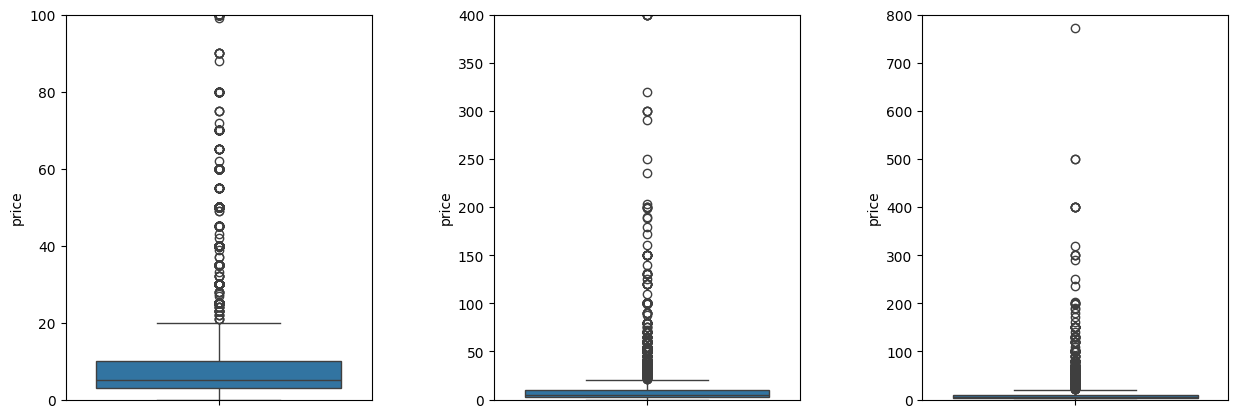

In [5]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=steam_games, y='price', ax=ax[0])
sns.boxplot(data=steam_games, y='price', ax=ax[1])
sns.boxplot(data=steam_games, y='price', ax=ax[2])
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 800)

plt.subplots_adjust(wspace=0.4)
plt.show()


En el gráfico, se observa que la columna de precios tiene numerosos valores excepcionales que superan los 20 y alcanzan hasta los 1000. No obstante, en una aplicación de juegos, es factible tener esta distribución, es decir, muchos juegos de bajo precio y varios de precio alto. Por esta razón, no se llevará a cabo un tratamiento especial.

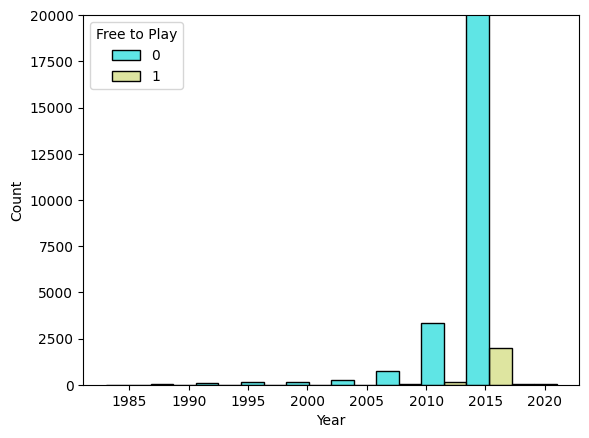

In [6]:
sns.histplot(data=steam_games,x='Year',hue='Free to Play',bins=10,palette='rainbow',multiple='dodge')

plt.ylim(0,20000)
plt.show()

Como se evidencia graficamente, en el 2015 podemos encontrar la mayor cantidad de juegos y la mayor cantidad y la mayor cantidad "Free To Play"

In [7]:
generos = list(steam_games.drop(columns=['app_name','price','id','developer','Accounting','Year']).columns)

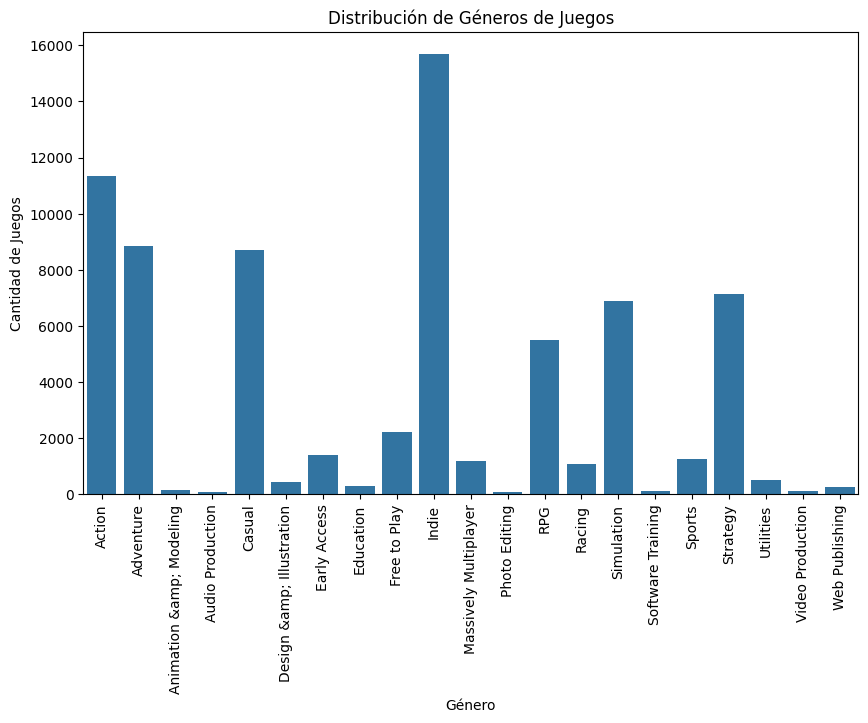

In [11]:
genre_counts = steam_games[generos].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)

# Se configuran etiquetas y títulos
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Géneros de Juegos')
plt.xticks(rotation=90)  # Se rotan a 90 grados las etiquetas del eje x para poder visibilizar los nombres completamente.
# Imprimir el gráfico
plt.show()


### Users Reviews

In [12]:
user_review = pd.read_csv('../datasets/user_reviews.csv')

In [13]:
user_review.sample(5)

,user_id,posted,item_id,recommend,sentiment_analysis
46846,76561198036779891,"Posted July 21, 2014.",269210,True,2
25817,bryceblacktop,"Posted October 29, 2015.",22300,True,2
14781,76561198043586020,"Posted April 9, 2014.",42160,True,0
27422,76561198010399847,"Posted April 4, 2014.",237870,True,2
32624,76561198103976065,"Posted February 22, 2015.",15750,True,2


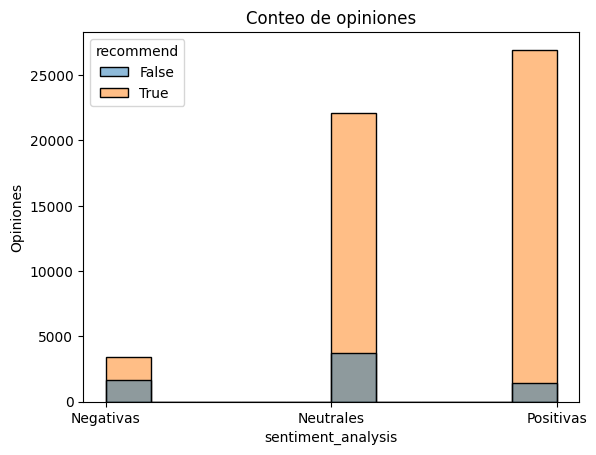

In [14]:
sns.histplot(data=user_review,x='sentiment_analysis',bins=10,hue='recommend')
plt.title('Conteo de opiniones')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'])
plt.ylabel('Opiniones')
plt.show()

Como se desprende del total de sentimientos negativos, un alto porcentaje corresponde a recomendaciones falsas, y en el caso de los sentimientos positivos, el total de recomendaciones verdaderas es considerablemente alto. En ambos casos, se observa un porcentaje significativo de recomendaciones que parecen contradecir el sentimiento expresado.

## Users Items

In [15]:
with gzip.open('../datasets/user_items_proc.csv.gz', 'rb') as f:
    user_items_proc = pd.read_csv(f, encoding='utf-8')

In [16]:
user_items_proc.sample(5)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
4896834,76561198079929251,62,76561198079929251,http://steamcommunity.com/profiles/76561198079...,342980.0,Destination Sol,7.0,0.0
1568894,sledgen,156,76561197971080067,http://steamcommunity.com/id/sledgen,346110.0,ARK: Survival Evolved,0.0,0.0
539989,thad33m0n,344,76561198002644780,http://steamcommunity.com/id/thad33m0n,2130.0,Dark Messiah of Might & Magic Multi-Player,20.0,0.0
2110551,AshphaltT2,39,76561198156184220,http://steamcommunity.com/id/AshphaltT2,386360.0,SMITE,0.0,0.0
4706718,76561198067848310,67,76561198067848310,http://steamcommunity.com/profiles/76561198067...,255520.0,Viscera Cleanup Detail: Shadow Warrior,0.0,0.0


In [17]:
user_items_proc['playtime_forever'].describe()

count    5.153209e+06
mean     9.914951e+02
std      5.418204e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

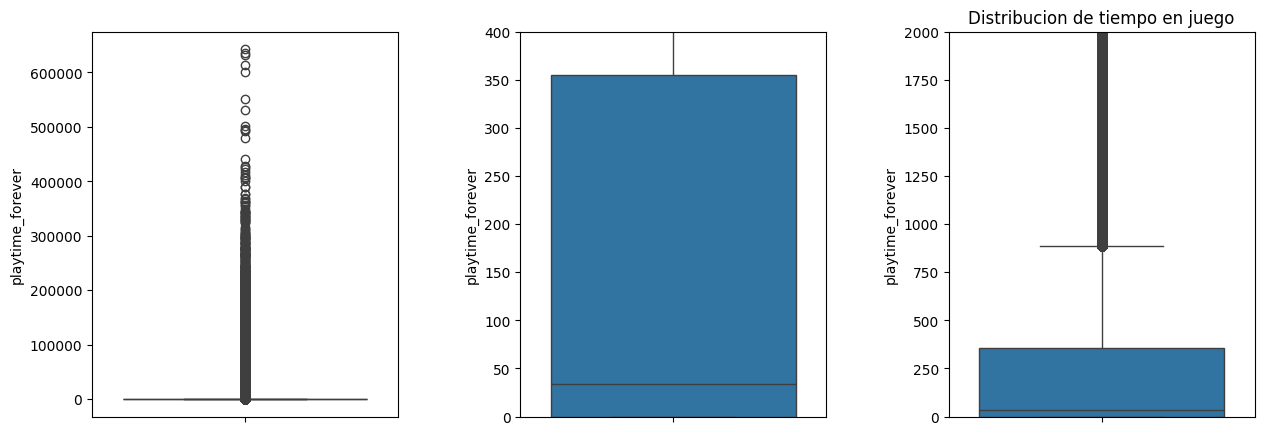

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[0])
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[1])
sns.boxplot(data=user_items_proc, y='playtime_forever', ax=ax[2])
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 2000)
plt.title('Distribucion de tiempo en juego')
plt.subplots_adjust(wspace=0.4)
plt.show()


Existen valores atípicos en la variable playtime_forever, pero solo se abordarán si se identifica un valor que exceda la cantidad de minutos desde el lanzamiento del juego hasta la fecha actual.

In [19]:
# Se agregan los comentarios explicativos
# Se unen los dataframes 'steam_games' y 'user_items_proc' basado en 'id' y 'item_id' respectivamente.
games_users = pd.merge(steam_games[['id','Year']], user_items_proc[['item_id','playtime_forever']], left_on='id', right_on='item_id', how='inner')

# Se buscan los valores erróneos en la columna 'playtime_forever' donde el tiempo de juego es mayor que la edad del juego en minutos
valores_playtime_erroneos = games_users[(2021 - games_users['Year'])*365*24*60 < games_users['playtime_forever']]

valores_playtime_erroneos

,id,Year,item_id,playtime_forever


Se podría analizar de manera que a menor cantidad de ítems, un usuario dedica más tiempo a un juego específico. Esto podría ayudar a entender por qué los valores atípicos no son necesariamente incorrectos.

In [20]:
playtime_poritem = user_items_proc.groupby('item_id')['playtime_forever'].sum().div(60).reset_index()
playtime_poritem
games_playtime = pd.merge(steam_games,playtime_poritem,left_on='id',right_on='item_id',how='inner')
games_playtime.sample(5)

,app_name,price,id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Year,item_id,playtime_forever
6600,Icewind Dale: Enhanced Edition,19.99,321800,Beamdog,0,0,1,0,0,0,...,0,0,0,1,0,0,0,2014.0,321800.0,799.483333
3039,Akin,2.99,487370,ThinkOfGames,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2016.0,487370.0,90.233333
7340,The LEGO® Movie - Videogame,19.99,267530,"TT Fusion,Traveller's Tales,Feral Interactive ...",0,1,1,0,0,1,...,0,0,0,0,0,0,0,2014.0,267530.0,6085.816667
3631,Toadled,0.99,521630,Giant Fox Studios,0,1,0,0,0,1,...,0,0,0,0,0,0,0,2016.0,521630.0,0.000000
825,Bridge It +,6.99,248370,Chronic Logic,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2013.0,248370.0,140.016667


In [21]:
# Se ordena el DataFrame 'games_playtime' en orden descendente por la columna 'playtime_forever'
games_playtime.sort_values(ascending=False,by='playtime_forever',inplace=True)

# Se seleccionan las primeras 15 filas después de ordenar y se almacenan en 'best_hours15'
best_hours15 = games_playtime.head(15)

# Se muestran las primeras 5 filas de 'best_hours15'
best_hours15.head(5)

,app_name,price,id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Year,item_id,playtime_forever
601,Counter-Strike: Global Offensive,14.99,730,Valve,0,1,0,0,0,0,...,0,0,0,1,0,0,0,2012.0,730.0,1.308640e+07
8,Garry's Mod,9.99,4000,Facepunch Studios,0,1,1,0,0,0,...,1,0,0,0,0,0,0,2006.0,4000.0,7.472777e+06
7990,Terraria,9.99,105600,Re-Logic,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2011.0,105600.0,2.582909e+06
7634,Warframe,0.00,230410,Digital Extremes,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2013.0,230410.0,2.067128e+06
8507,Counter-Strike: Source,19.99,240,Valve,0,1,0,0,0,0,...,1,0,0,1,0,0,0,2004.0,240.0,1.876867e+06


A partir del dataframe del ranking de juegos por horas jugadas se grafica

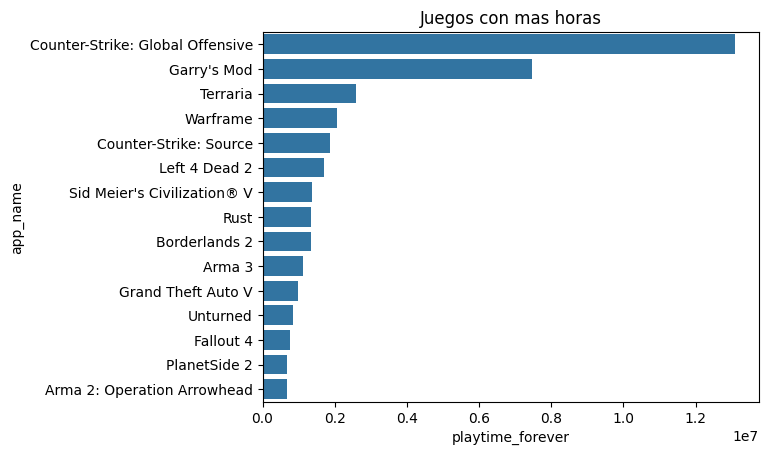

In [22]:
sns.barplot(data=best_hours15,y='app_name',x='playtime_forever')
plt.title('Juegos con mas horas')
plt.show()

Ahora se va agrupar por desarrollador

In [23]:
# Se agrupan los datos por 'developer' y calcula la suma de 'playtime_forever'.
games_playtime_dev = games_playtime.groupby('developer')['playtime_forever'].sum().reset_index()

# Se ordena los datos en orden descendente por 'playtime_forever'.
games_playtime_dev.sort_values(ascending=False,by='playtime_forever',inplace=True)

# Se seleccionan los 15 'developer' con más tiempo de juego acumulado.
best_games_playtime_dev = games_playtime_dev.head(15)

# Se muestran los primeros 5 'developer' con más tiempo de juego.
best_games_playtime_dev.head(5)

,developer,playtime_forever
5070,Valve,1.824512e+07
1671,Facepunch Studios,8.824784e+06
3843,Re-Logic,2.582909e+06
672,Bohemia Interactive,2.445825e+06
1334,Digital Extremes,2.079624e+06


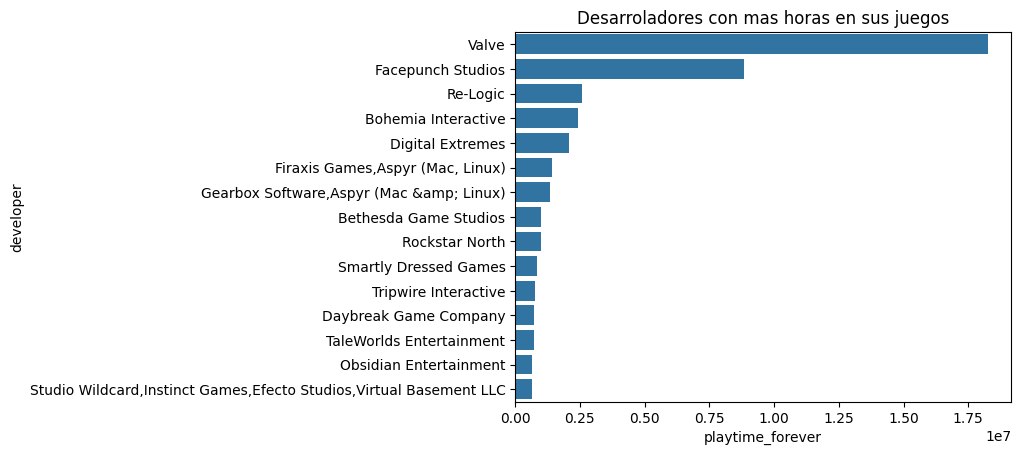

In [25]:
# Se importan librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Aquí se utiliza la función sns.barplot para representar algunos datos de manera informativa.
# Los datos para nuestro gráfico se toman del conjunto de datos best_games_playtime_dev.
# El eje y representa a los desarrolladores, mientras que el eje x representa el tiempo de juego eterno.
sns.barplot(data=best_games_playtime_dev,y='developer',x='playtime_forever')
plt.title('Desarroladores con mas horas en sus juegos')
plt.show()

Partiendo de user_review se van a sumar las cantidades de recomendaciones positivas.


In [26]:
# Se agrupan las reseñas de usuarios por 'item_id' y se aplican una transformación de 'recommend'
user_review_cop = user_review
# Recomendaciones positivas suma y negativas resta
user_review_cop['recommend'] = user_review['recommend'].apply(lambda x:1 if x else -1)
user_review_rec = user_review_cop.groupby('item_id')['recommend'].sum().reset_index()

# Se unen los dataframes 'steam_games' y 'user_review_rec' en la columna 'id' e 'item_id', respectivamente
games_recommend = pd.merge(steam_games,user_review_rec,left_on='id',right_on='item_id',how='inner')

# Se agregan las recomendaciones por desarrollador
games_recommend = games_recommend.groupby('developer')['recommend'].sum().reset_index()

# Se ordenan los valores en orden descendente para obtener los mejores recomendados
games_recommend.sort_values(ascending=False,by='recommend',inplace=True) # Obtengo las mejores recomendaciones

# Se toman los primeros 15 resultados
games_recommend_best = games_recommend.head(15)

# Se mestran los primeros 5 resultados
games_recommend_best.head(5)

,developer,recommend
1936,Valve,8728
639,Facepunch Studios,2224
1628,Smartly Dressed Games,888
250,Bohemia Interactive,749
1433,Re-Logic,705


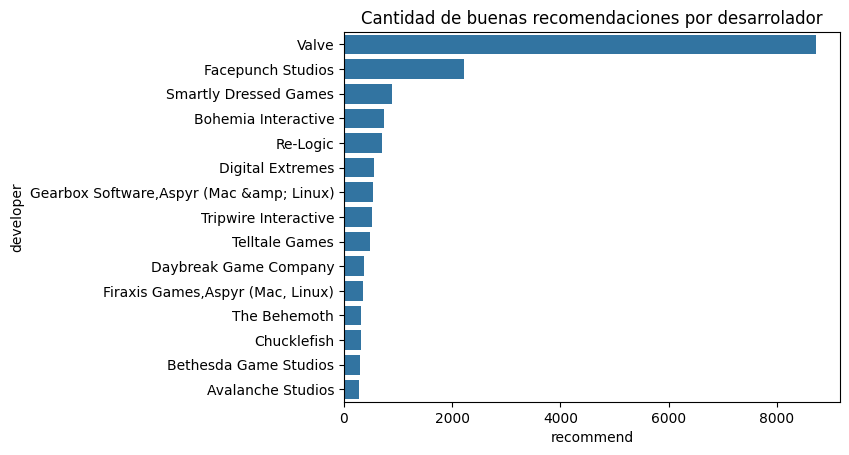

In [27]:
sns.barplot(data=games_recommend_best,x='recommend',y='developer')
plt.title('Cantidad de buenas recomendaciones por desarrolador')
plt.show()